# Implementation of Lasso and Ridge Regression using Diamond Dataset and comparing it with Linear Regression

In [51]:
# import the necessary libraries
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

# Machine Learning and Metrics Libraries

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# load the Boston housing dataset


In [52]:
# Read the dataset
df = pd.read_csv("diamonds.csv")

# Taking a random sample of 1000 observations from the dataset
df = df.sample(n=500, random_state=69)
df.head()

,carat,depth,table,price,Vol,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
47803,0.660,62.800,57.000,1901,107.692,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
25068,1.060,61.900,56.000,13588,172.005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
518,0.740,63.100,58.000,2824,119.270,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5135,1.000,64.000,53.000,3763,160.853,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
21753,1.500,61.000,60.000,9820,237.136,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# Data Description

#### The dataset contains 53940 observations and 10 variables and after preprocessing and sampling we are going to use 500 observations and 22 features.

> #### **carat** - The weight of the diamond (0.2--5.01)
> #### **cut** - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
> #### **color** - Color of the diamond, with D being the best and J the worst
> #### **clarity** - A measurement of how clear the diamond is
> #### **depth** - The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
> #### **table** - The width of the diamond's table expressed as a percentage of its average diameter
> #### **x** - Length in mm
> #### **y** - Width in mm
> #### **z** - Depth in mm
> #### **price** - The price of the diamond

In [53]:
# Taking a random sample of 1000 observations from the dataset

df = df.sample(n=500, random_state=69)

df.head()

,carat,depth,table,price,Vol,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
17285,1.030,61.200,54.000,6922,170.822,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
11040,0.330,59.700,58.000,594,54.592,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
14063,0.300,63.400,58.000,605,48.359,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
38941,0.310,62.200,59.000,489,51.515,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
47803,0.660,62.800,57.000,1901,107.692,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [54]:
# Checking the correlation of feature with the target variable
df.corr()["price"].sort_values(ascending=False)

price            1.000
Vol              0.898
carat            0.895
cut_Premium      0.103
clarity_SI2      0.094
table            0.086
cut_Good         0.056
color_I          0.047
depth            0.041
clarity_VS2      0.036
color_H          0.033
color_J          0.033
color_G          0.025
clarity_SI1      0.011
clarity_VS1     -0.019
color_F         -0.022
cut_Very Good   -0.032
color_E         -0.050
clarity_VVS2    -0.070
clarity_IF      -0.071
clarity_VVS1    -0.087
cut_Ideal       -0.130
Name: price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"], axis=1)
y = df["price"]

# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression

Linear Regression RMSE:  1189.8983418348355
Linear Regression R2 score 0.863705511798364
Linear Regression Coefficients:  [ 7.53104069e+01  4.01894521e+00 -8.10686768e+00  5.63641569e+01
  1.75219576e+02  2.26188616e+02  3.28047317e+02  2.60313168e+02
 -1.70725987e+02 -3.07074717e+02 -5.69809211e+02 -1.28825743e+03
 -1.62796170e+03 -2.30808755e+03  7.62316092e+03  5.66339031e+03
  4.33949001e+03  6.68447834e+03  6.54699223e+03  7.42987140e+03
  7.41246087e+03]
Linear Regression Intercept:  -8832.147252851688


<Axes: xlabel='price'>

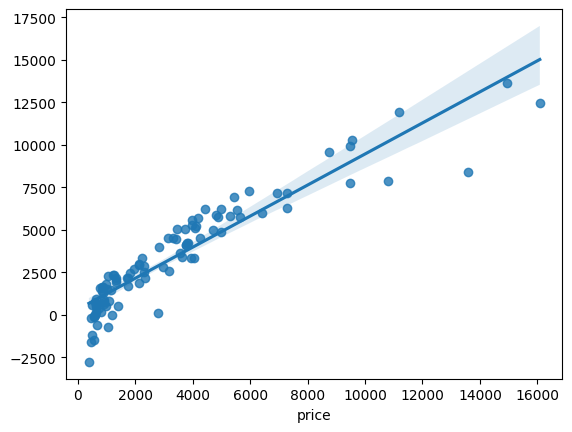

In [56]:
# Applying Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions) ** 0.5
print("Linear Regression RMSE: ", lr_mse)
print("Linear Regression R2 score", r2_score(y_test, lr_predictions))
print("Linear Regression Coefficients: ", lr.coef_)
print("Linear Regression Intercept: ", lr.intercept_)


sns.regplot(x=y_test, y=lr_predictions, fit_reg=True)

# Lasso Regression

alpha:  0
coefficients:  [ 4432.74975979   -22.83686332   -18.42126103    29.54887314
   261.30200454   350.71161608   457.1890032    390.70473777
  -180.23982426  -312.23331266  -587.02581172 -1310.31374528
 -1624.60963834 -2343.98047974  7725.92711896  5744.50541529
  4419.85642719  6784.65875863  6638.23044726  7523.50792418
  7498.56934611]
intercept:  -6774.164840895301
R2 Score:  0.8636242635067006
RMSE:  1190.252951933954
----------------------------------------------------


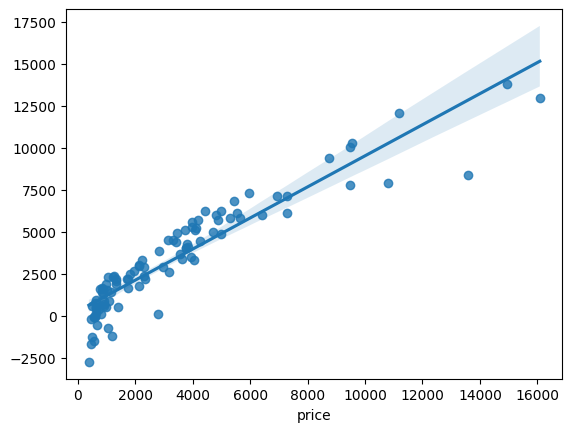

alpha:  10
coefficients:  [   -0.           -15.76359675   -17.47818353    54.07085611
     0.             0.             0.             0.
    51.86977773    -0.          -359.19792238  -849.40574139
 -1347.14978529 -1864.07785181  2779.9933579   1255.66244883
    12.98815293  2194.06944244  2118.19614832  2796.24964218
  2784.44920834]
intercept:  -2315.7225390391854
R2 Score:  0.8464330909968794
RMSE:  1263.047065511252
----------------------------------------------------


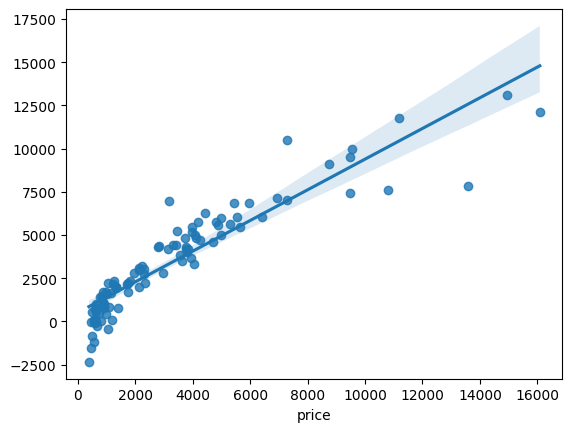

alpha:  20
coefficients:  [   -0.           -18.65506509   -25.67279997    52.52219362
     0.             0.            -0.             0.
   135.14012367     0.          -163.73558449  -625.24722564
 -1114.46025726 -1485.55754469  1107.08742826     0.
  -997.42419584   826.75215238   811.00236729  1279.38859458
  1358.76942114]
intercept:  -323.5960104613373
R2 Score:  0.8218630146936027
RMSE:  1360.3409191918918
----------------------------------------------------


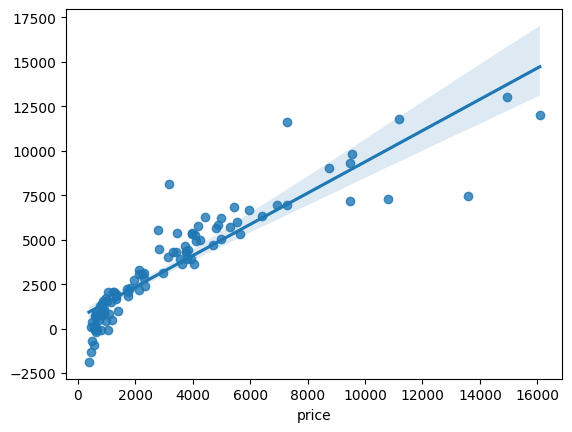

alpha:  30
coefficients:  [   -0.           -19.18429591   -29.02908514    51.65638126
     0.             0.            -0.             0.
   190.28103799     0.            -0.          -460.21372766
  -894.22510138 -1117.35810679   576.2429567     -0.
 -1062.84921162   577.91288351   611.46107951   899.09229705
  1072.71300056]
intercept:  72.53004031374257
R2 Score:  0.8130633640386735
RMSE:  1393.5351390491994
----------------------------------------------------


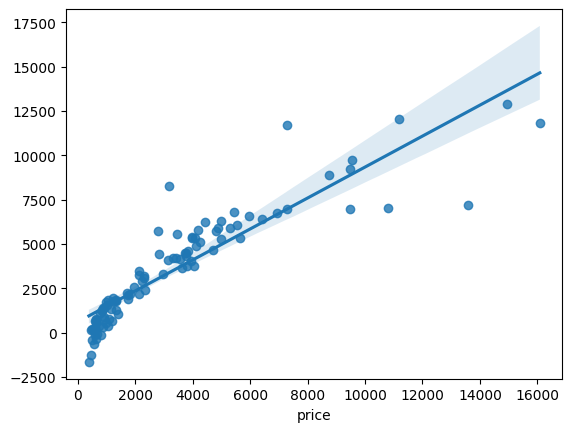

alpha:  40
coefficients:  [   -0.           -20.52858791   -31.7761479     50.87142046
     0.             0.            -0.             0.
   181.91369845     0.            -0.          -333.50795425
  -749.99397017  -853.80686061     0.          -518.75008811
 -1542.67812414     0.            10.73150861   159.64521817
   388.14662378]
intercept:  938.540439127501
R2 Score:  0.7951726269328574
RMSE:  1458.6957255041066
----------------------------------------------------


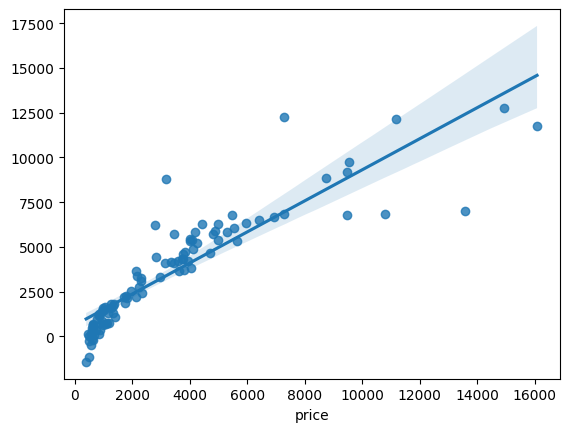

alpha:  50
coefficients:  [   -0.           -21.13527492   -31.97065335    50.38008563
     0.             0.            -0.             0.
   165.07764031     0.             0.          -220.27419498
  -598.07034082  -581.31751909     0.          -490.56556816
 -1479.9343454      0.             0.             0.
   277.30645191]
intercept:  1019.0444151447305
R2 Score:  0.7886224831648209
RMSE:  1481.83588803394
----------------------------------------------------


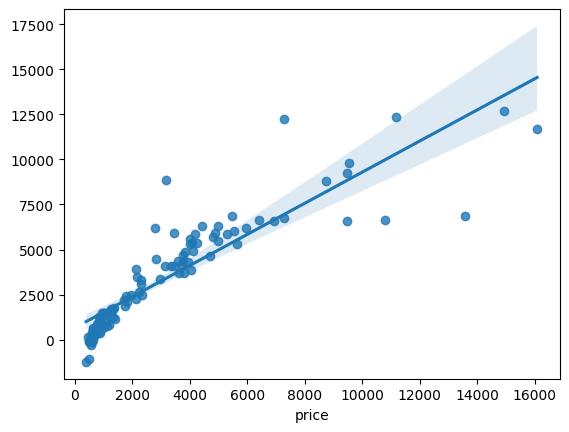

alpha:  60
coefficients:  [   -0.           -20.45356363   -32.70015253    49.95323818
     0.             0.            -0.             0.
   154.03181765     0.             0.          -110.82291012
  -458.08652131  -301.9129457      0.          -436.47299307
 -1393.36942126     0.             0.             0.
   194.00718029]
intercept:  1016.9427695405539
R2 Score:  0.7815455620320928
RMSE:  1506.43760617509
----------------------------------------------------


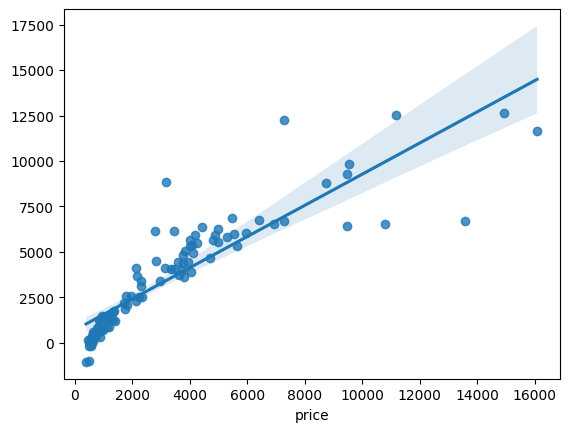

alpha:  70
coefficients:  [   -0.           -19.77771495   -33.4316083     49.52638845
     0.             0.            -0.             0.
   142.98978935     0.             0.            -1.36981594
  -318.10269833   -22.50571781     0.          -382.37949346
 -1306.80325059     0.             0.             0.
   110.7054778 ]
intercept:  1015.3141540396764
R2 Score:  0.7728019628298596
RMSE:  1536.289280516154
----------------------------------------------------


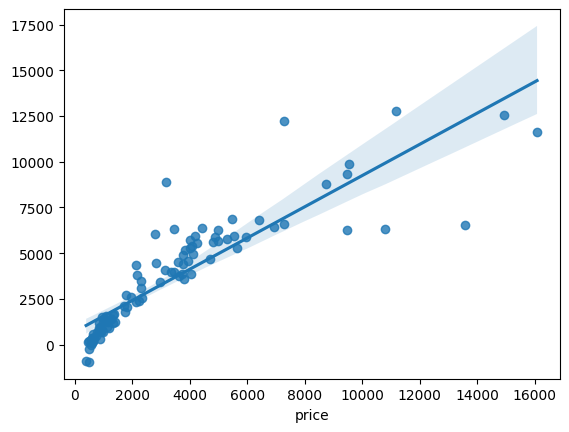

alpha:  80
coefficients:  [   -0.           -14.54474553   -31.86736993    49.21922547
     0.             0.            -0.             0.
    99.10636068     0.             0.            -0.
  -217.91206764    -0.             0.          -317.64082133
 -1211.10434549     0.             0.             0.
    23.9483149 ]
intercept:  617.2513674752131
R2 Score:  0.768909088858149
RMSE:  1549.3949823735113
----------------------------------------------------


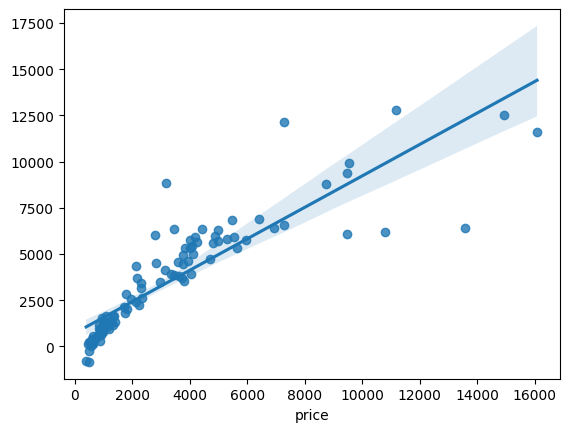

alpha:  90
coefficients:  [   -0.            -8.38994133   -29.98401984    48.94780929
     0.             0.            -0.             0.
    50.92840072     0.             0.            -0.
  -116.8350905     -0.             0.          -244.22869734
 -1107.97350628     0.             0.             0.
     0.        ]
intercept:  132.38512731209585
R2 Score:  0.7664241067449797
RMSE:  1557.7032353280683
----------------------------------------------------


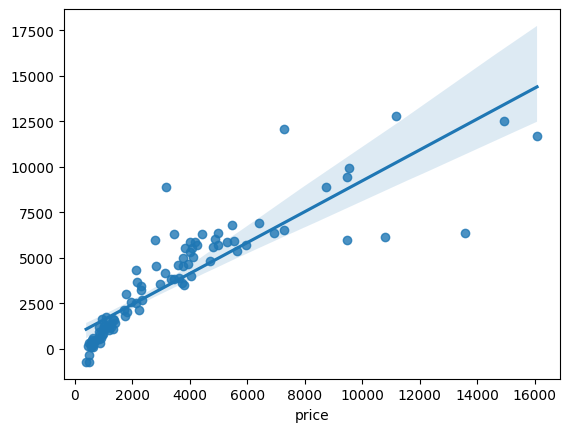

alpha:  100
coefficients:  [   -0.            -1.95992216   -28.02946731    48.68702178
     0.             0.            -0.             0.
     1.67318882     0.             0.            -0.
   -14.70392836    -0.             0.          -167.62099648
 -1002.07234018     0.             0.             0.
     0.        ]
intercept:  -378.1666590885002
R2 Score:  0.7640267820539605
RMSE:  1565.6766339545165
----------------------------------------------------


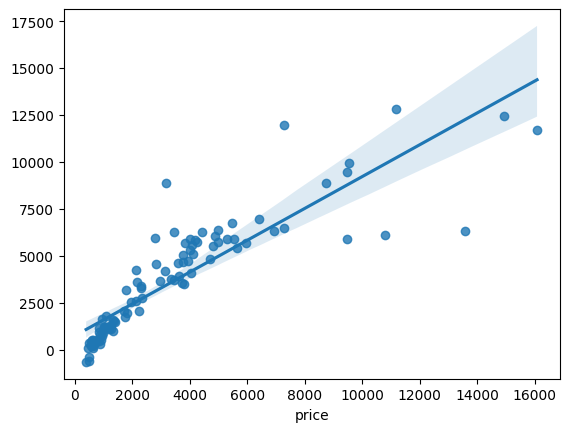

alpha:  110
coefficients:  [  -0.           -0.          -28.30104795   48.52392121    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
  -88.61254683 -895.86130338    0.            0.            0.
    0.        ]
intercept:  -498.8492655462701
R2 Score:  0.7627025724363314
RMSE:  1570.0635375792992
----------------------------------------------------


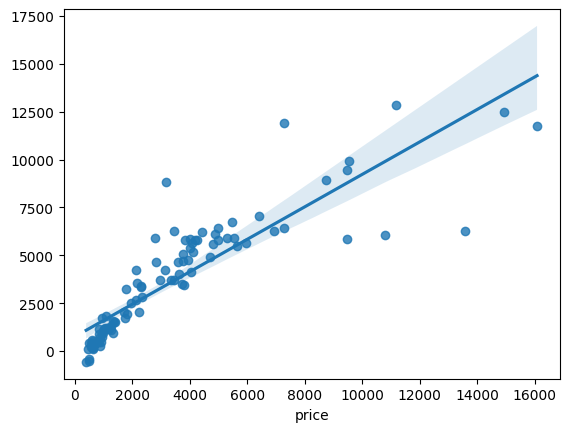

alpha:  120
coefficients:  [  -0.           -0.          -29.20871564   48.37480876    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -9.28792192 -789.40023237    0.            0.            0.
    0.        ]
intercept:  -462.8181782513652
R2 Score:  0.7612660276040852
RMSE:  1574.808771138669
----------------------------------------------------


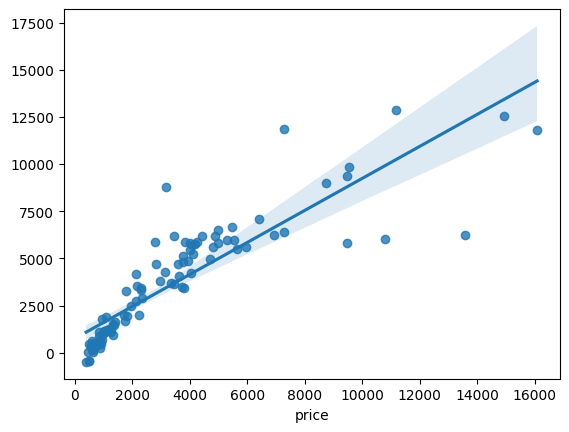

alpha:  130
coefficients:  [  -0.           -0.          -28.91154897   48.27252487    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -706.32706774    0.            0.            0.
    0.        ]
intercept:  -481.941875341236
R2 Score:  0.7603691098981491
RMSE:  1577.7642568723227
----------------------------------------------------


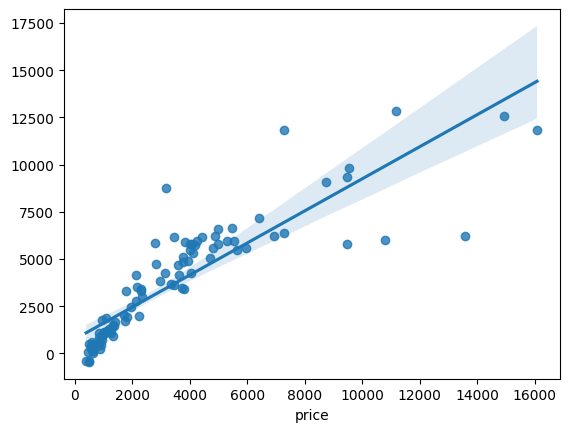

alpha:  140
coefficients:  [  -0.           -0.          -28.45212739   48.17648312    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -626.35959918    0.            0.            0.
    0.        ]
intercept:  -508.52602111698116
R2 Score:  0.7593705468653575
RMSE:  1581.0481806661094
----------------------------------------------------


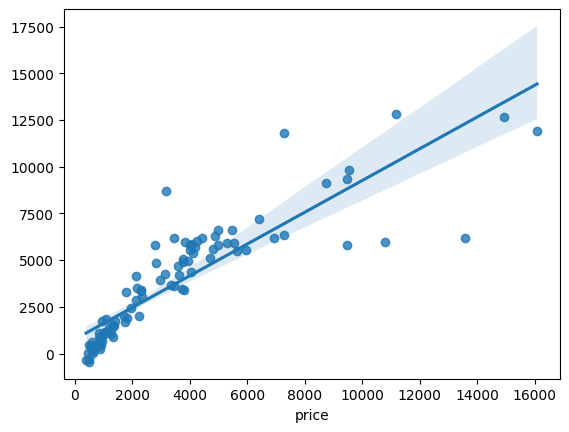

alpha:  150
coefficients:  [  -0.           -0.          -27.99407079   48.08045996    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -546.39177216    0.            0.            0.
    0.        ]
intercept:  -535.0340207888826
R2 Score:  0.7581574841966022
RMSE:  1585.0283656112365
----------------------------------------------------


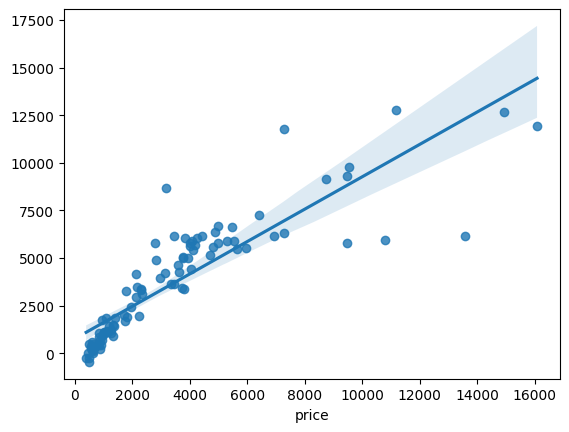

alpha:  160
coefficients:  [  -0.           -0.          -27.52757366   47.98432348    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -466.42624347    0.            0.            0.
    0.        ]
intercept:  -562.0130708982747
R2 Score:  0.7567296751148238
RMSE:  1589.700388266227
----------------------------------------------------


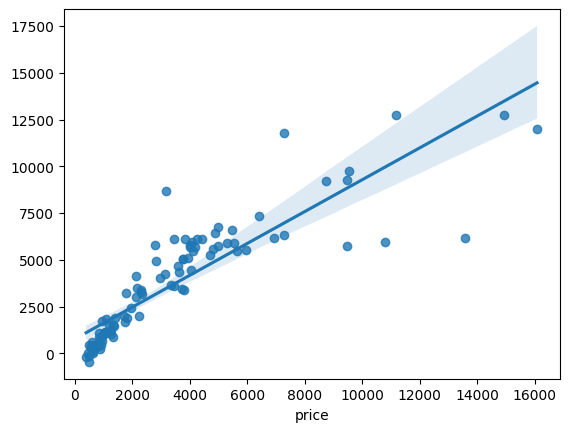

alpha:  170
coefficients:  [  -0.           -0.          -27.07019365   47.88830796    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -386.45815697    0.            0.            0.
    0.        ]
intercept:  -588.4831369305662
R2 Score:  0.7550875653666493
RMSE:  1595.0567178176523
----------------------------------------------------


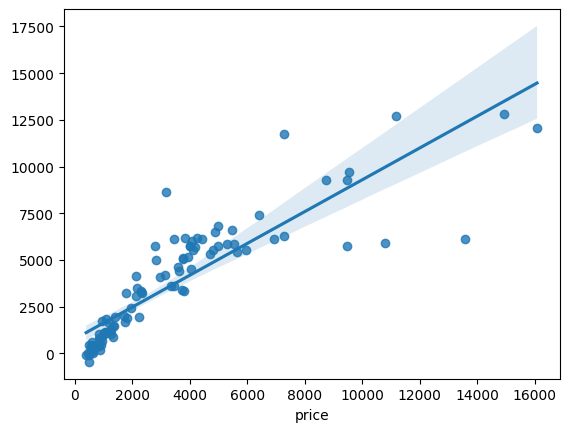

alpha:  180
coefficients:  [  -0.           -0.          -26.60691051   47.79221824    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -306.49194285    0.            0.            0.
    0.        ]
intercept:  -615.2832582052092
R2 Score:  0.7532307570204346
RMSE:  1601.0917773196861
----------------------------------------------------


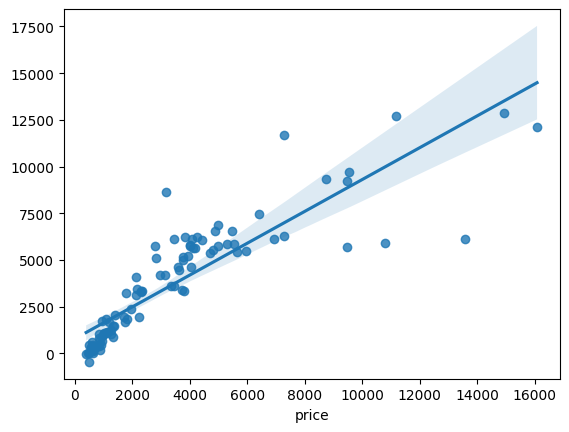

alpha:  190
coefficients:  [  -0.           -0.          -26.14885417   47.69619253    0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -226.52398167    0.            0.            0.
    0.        ]
intercept:  -641.7909340046267
R2 Score:  0.7511595663580894
RMSE:  1607.796901938186
----------------------------------------------------


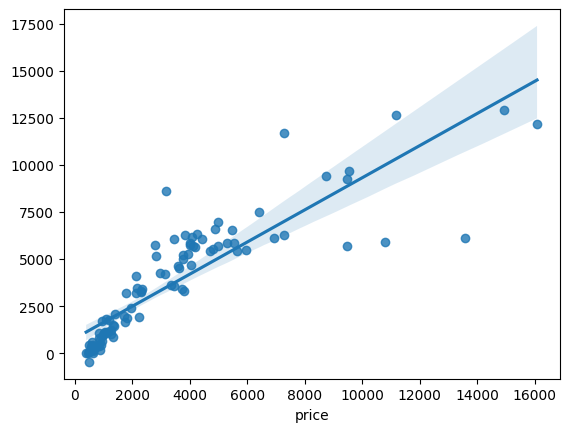

alpha:  200
coefficients:  [  -0.           -0.          -25.68646918   47.6001133     0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.         -146.5574409     0.            0.            0.
    0.        ]
intercept:  -668.5407415564564
R2 Score:  0.7488737144983898
RMSE:  1615.1646434901304
----------------------------------------------------


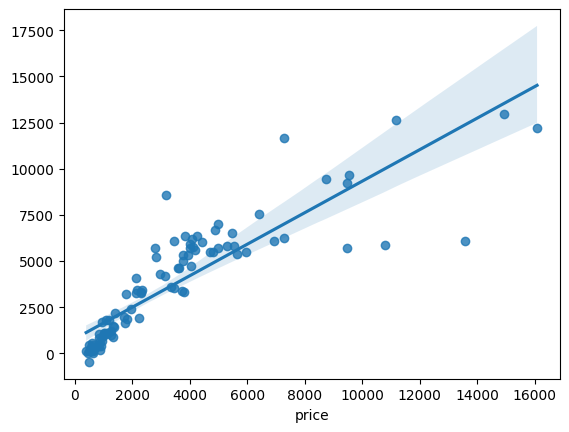

In [66]:
# Apply Lasso Regression and print the coefficients and the intercept of the model
r2_lasso = {}
for aplha in range(0,201,10):
    lasso = Lasso(alpha=aplha)
    lasso.fit(X_train, y_train)
    print("alpha: ", aplha)
    print("coefficients: ", lasso.coef_)
    print("intercept: ", lasso.intercept_)
    print("R2 Score: ", r2_score(y_test, lasso.predict(X_test)))
    r2_lasso[aplha] = r2_score(y_test, lasso.predict(X_test))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
    print("----------------------------------------------------")
    sns.regplot(x=y_test, y=lasso.predict(X_test))
    plt.show()

# Ridge Regression

alpha:  0
coefficients:  [ 7.53104069e+01  4.01894521e+00 -8.10686768e+00  5.63641569e+01
  1.75219576e+02  2.26188616e+02  3.28047317e+02  2.60313168e+02
 -1.70725987e+02 -3.07074717e+02 -5.69809211e+02 -1.28825743e+03
 -1.62796170e+03 -2.30808755e+03  7.62316092e+03  5.66339031e+03
  4.33949001e+03  6.68447834e+03  6.54699223e+03  7.42987140e+03
  7.41246087e+03]
intercept:  -8832.14725284867
R2:  0.8637055117983643
RMSE:  1189.8983418348341
----------------------------------------------------
alpha:  10
coefficients:  [ -110.93559978   -29.09062603   -28.59296509    53.02872695
   229.98450435   233.52769486   153.99595296   209.07910314
   293.7152361    169.11386287  -122.503234    -569.05173822
  -979.00088623 -1161.9776089    901.4077485    -37.26404716
 -1011.00630514   739.60136896   730.94928183  1094.48887792
  1145.70977459]
intercept:  295.26088444614925
R2:  0.822940680349664
RMSE:  1356.219886710097
----------------------------------------------------
alpha:  20
coeffici

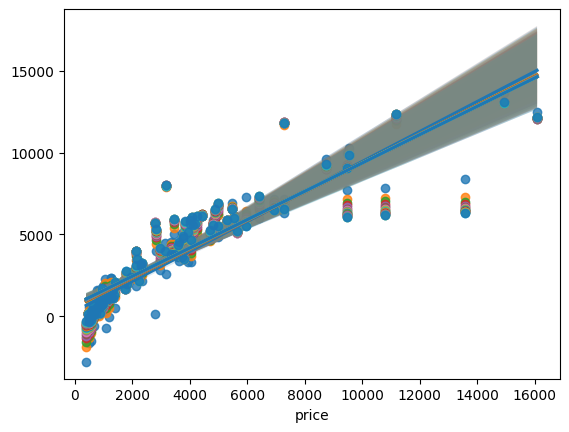

In [68]:
# apply L2 regression and print the coefficients as they will shrink
r2_ridge = {}
for alpha in range(0,201,10):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alpha: ", alpha)
    print("coefficients: ", ridge.coef_)
    print("intercept: ", ridge.intercept_)
    print("R2: ", r2_score(y_test, ridge.predict(X_test)))
    r2_ridge[alpha] = r2_score(y_test, ridge.predict(X_test))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
    print("----------------------------------------------------")
    sns.regplot(x=y_test, y=ridge.predict(X_test))


In [69]:
r2_values = pd.DataFrame([r2_lasso, r2_ridge]).T
r2_values.reset_index(inplace=True)
r2_values.columns = ['Alpha',"Lasso", "Ridge"]

In [71]:
r2_values.sort_values(by=['Ridge'], ascending=False).head(10)

,Alpha,Lasso,Ridge
0,0,0.864,0.864
1,10,0.846,0.823
2,20,0.822,0.814
3,30,0.813,0.808
4,40,0.795,0.804
5,50,0.789,0.800
6,60,0.782,0.797
7,70,0.773,0.795
8,80,0.769,0.792
9,90,0.766,0.790


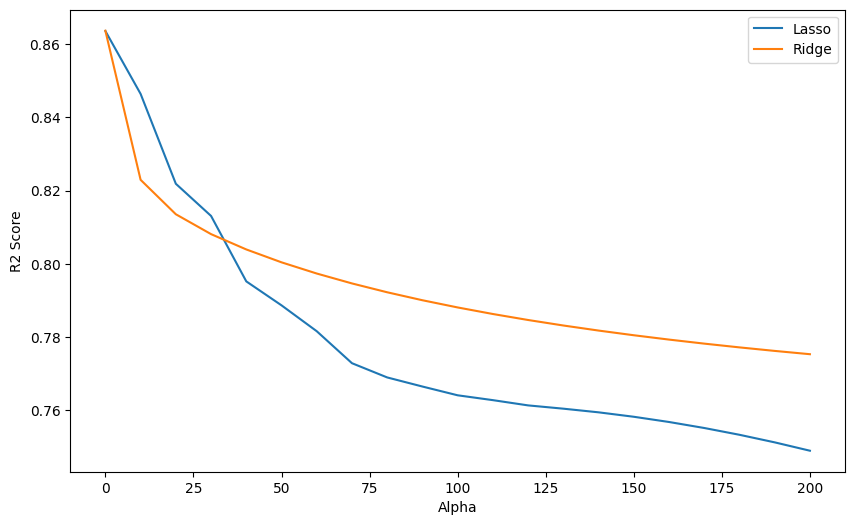

In [72]:
# Plot the R2 scores for both Lasso and Ridge with respect to alpha

plt.figure(figsize=(10, 6))
plt.plot(list(r2_lasso.keys()), list(r2_lasso.values()), label="Lasso")
plt.plot(list(r2_ridge.keys()), list(r2_ridge.values()), label="Ridge")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.legend()
plt.show()

In [73]:
# Making a Data Frame for thhe RMSE, Bias and Variance for Linear Regression, Lasso and Ridge Regression

compare_df=pd.DataFrame({"RMSE":[],"Bias":[],"Variance":[]})

# Making list of model names and their objects
model_names = [("Linear Regression", LinearRegression()), ("Lasso Regression", Lasso(alpha=3.8)), ("Ridge Regression", Ridge(alpha=0.3))]

for name, model in model_names:
    # Calculating the Bias and Variance
    mse, bias, var = bias_variance_decomp(
        model,
        X_train.values,
        y_train.values,
        X_test.values,
        y_test.values,
        loss="mse",
        num_rounds=200,
        random_seed=1,
    )
    # Calculating the RMSE
    rmse = np.sqrt(mse)
    # Appending the results to the compare_df
    compare_df = compare_df.append(
        pd.DataFrame(
            {"RMSE": rmse, "Bias": bias, "Variance": var}, index=[name]
        )
    )



In [74]:
compare_df

,RMSE,Bias,Variance
Linear Regression,1274.561,1417112.847,207393.395
Lasso Regression,1225.692,1356812.180,145507.833
Ridge Regression,1210.212,1325290.553,139322.670
